**Analista:** Antony Leiva

## Parte 1: Selección del dataset

Nombre: Students' Social Media Addiction

Fuente: Kaggle

URL: https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships


## Parte 2: Descripción del dataset

Seleccionamos el dataset titulado **Students Social Media Addiction**, el cual contiene información sobre estudiantes,
su uso diario de redes sociales, estado emocional, rendimiento académico y otros aspectos personales.

Este dataset contiene variables que exploran la relación entre el uso de redes sociales y diversos aspectos de la vida de los estudiantes, incluyendo:

- Identificación y datos demográficos (ID, edad, país, género)
- Uso de redes sociales (plataforma más usada, horas diarias, conflictos generados)
- Efectos académicos, emocionales y sociales (afecta el rendimiento, salud mental, relaciones)


In [ ]:
import pandas as pd
df = pd.read_csv("Students Social Media Addiction.csv")
print(f"Este dataset contiene {df.shape[0]} registros y {df.shape[1]} columnas.")
df.head()

Este dataset contiene 705 registros y 13 columnas.


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


## Parte 3: Identificación de tipos de variables


### Variables Numéricas:

- `Student_ID`: Identificador numérico del estudiante.
- `Age`: Edad del estudiante.
- `Avg_Daily_Usage_Hours`: Promedio de horas diarias de uso de redes sociales.
- `Sleep_Hours_Per_Night`: Promedio de horas que duerme por noche.
- `Mental_Health_Score`: Puntuación de salud mental.
- `Conflicts_Over_Social_Media`: Número de conflictos generados por redes sociales.
- `Addicted_Score`: Puntuación de nivel de adicción.

### Variables Categóricas:

- `Gender`: Género del estudiante (Male, Female, etc.).
- `Academic_Level`: Nivel académico (High School, Undergraduate, Graduate, etc.).
- `Country`: País de origen.
- `Most_Used_Platform`: Plataforma de redes sociales más utilizada.
- `Affects_Academic_Performance`: Indica si el rendimiento académico se ve afectado (Sí/No).
- `Relationship_Status`: Estado sentimental (Single, In Relationship, Complicated, etc.).


In [ ]:
df.dtypes.reset_index().rename(columns={"index": "Variable", 0: "Tipo de Dato"})

,Variable,Tipo de Dato
0,Student_ID,int64
1,Age,int64
2,Gender,object
3,Academic_Level,object
4,Country,object
5,Avg_Daily_Usage_Hours,float64
6,Most_Used_Platform,object
7,Affects_Academic_Performance,object
8,Sleep_Hours_Per_Night,float64
9,Mental_Health_Score,int64


## Parte 4: Escalas de medición de cada variable

Determinamos la escala de medición más adecuada para cada variable:

- **Nominal**: `Country`, `Most_Used_Platform`, `Relationship_Status`, `Age`
- **Ordinal**: `Academic_Level`,`Avg_Daily_Usage_Hours`, `Sleep_Hours_Per_Night`, `Mental_Health_Score`, `Addicted_Score`, `Conflicts_Over_Social_Media`
- **Binaria**: `Affects_Academic_Performance`, `Gender`

## Parte 5: Transformación de Datos

En esta sección realizamos algunas transformaciones útiles para el análisis:

- Se creó la columna `Age_Range` agrupando las edades en intervalos.
- Se generó `Addiction_Level` a partir de `Addicted_Score`, clasificando el nivel de adicción como Bajo, Moderado o Alto.
- Se clasificó el número de horas de sueño (`Sleep_Hours_Per_Night`) en categorías: Poco, Normal, Mucho.

In [ ]:
# Crear una nueva columna con rangos de edad
df['Age_Range'] = pd.cut(df['Age'], bins=[0, 18, 21, 25, 100], labels=['<=18', '19-21', '22-25', '26+'])

# Crear niveles de adicción
df['Addiction_Level'] = pd.cut(df['Addicted_Score'], bins=[-1, 3, 6, 10], labels=['Bajo', 'Moderado', 'Alto'])

# Clasificar sueño en categorías
df['Sleep_Category'] = pd.cut(df['Sleep_Hours_Per_Night'], bins=[0, 5, 7, 24], labels=['Poco', 'Normal', 'Mucho'])

# Ver las transformaciones aplicadas
df[['Age', 'Age_Range', 'Addicted_Score', 'Addiction_Level', 'Sleep_Hours_Per_Night', 'Sleep_Category']].head()

,Age,Age_Range,Addicted_Score,Addiction_Level,Sleep_Hours_Per_Night,Sleep_Category
0,19,19-21,8,Alto,6.5,Normal
1,22,22-25,3,Bajo,7.5,Mucho
2,20,19-21,9,Alto,5.0,Poco
3,18,<=18,4,Moderado,7.0,Normal
4,21,19-21,7,Alto,6.0,Normal


## Parte 6: Limpieza de Datos

- **Datos faltantes:** No se encontraron valores nulos en ninguna de las 13 variables.

- **Datos inconsistentes:** A partir del resumen estadístico:
  - La edad de los estudiantes (`Age`) oscila entre 18 y 24 años, lo cual es coherente con la población objetivo.
  - Las horas de uso diario (`Avg_Daily_Usage_Hours`) están entre 1.5 y 8.5 horas, lo cual es coherente con la población objetivo.
  - Las horas de sueño (`Sleep_Hours_Per_Night`) varían entre 3.8 y 9.6, lo cual es coherente con la población objetivo.
  - Los puntajes de salud mental y adicción están en escalas de 0 a 10, sin valores fuera del rango esperado.

En conclusión, el dataset está limpio

In [ ]:
# Revisión de valores faltantes
print("Valores nulos por columna:")
print(df.isnull().sum())

# Estadísticas generales para detectar inconsistencias
print("\nResumen estadístico:")
print(df.describe(include='all'))

Valores nulos por columna:
Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
Age_Range                       0
Addiction_Level                 0
Sleep_Category                  0
dtype: int64

Resumen estadístico:
        Student_ID         Age  Gender Academic_Level Country  \
count   705.000000  705.000000     705            705     705   
unique         NaN         NaN       2              3     110   
top            NaN         NaN  Female  Undergraduate   India   
freq           NaN         NaN     353            353      53   
mean    353.000000   20.659574     NaN            NaN     NaN   
std 

## Parte 8a: Tablas de frecuencia y acumulación



Las siguientes variables categóricas fueron incluidas:

- `Gender`: género del estudiante.
- `Academic_Level`: nivel académico alcanzado.
- `Country`: país de origen del estudiante.
- `Most_Used_Platform`: red social más utilizada.
- `Affects_Academic_Performance`: si el rendimiento académico se ve afectado.
- `Relationship_Status`: estado sentimental del estudiante.
- `Age_Range`: rangos de edad creados a partir de la variable `Age`.
- `Addiction_Level`: nivel de adicción según `Addicted_Score`.
- `Sleep_Category`: clasificación de horas de sueño por noche.

Cada tabla muestra:
- Frecuencia absoluta
- Porcentaje relativo
- Porcentaje acumulado


In [ ]:
categorical_columns = [
    'Gender',
    'Academic_Level',
    'Country',
    'Most_Used_Platform',
    'Affects_Academic_Performance',
    'Relationship_Status',
    'Age_Range',
    'Addiction_Level',
    'Sleep_Category'
]

# Crear diccionario con tablas de frecuencia para cada columna categórica
frequency_tables = {}
for col in categorical_columns:
    freq = df[col].value_counts().reset_index()
    freq.columns = [col, 'Frecuencia']
    freq['Porcentaje (%)'] = (freq['Frecuencia'] / len(df) * 100).round(2)
    freq['Acumulado (%)'] = freq['Porcentaje (%)'].cumsum()
    frequency_tables[col] = freq

# Mostrar tabla
#frequency_tables['Gender']
frequency_tables['Academic_Level']
# frequency_tables['Country']
# frequency_tables['Most_Used_Platform']
# frequency_tables['Affects_Academic_Performance']
# frequency_tables['Relationship_Status']
# frequency_tables['Age_Range']
# frequency_tables['Addiction_Level']
# frequency_tables['Sleep_Category']

,Academic_Level,Frecuencia,Porcentaje (%),Acumulado (%)
0,Undergraduate,353,50.07,50.07
1,Graduate,325,46.10,96.17
2,High School,27,3.83,100.00


## Parte 8b: Anomalías y valores extremos

Sesgo y valores atípicos:  

Variables como `Addicted_Score` y `Sleep_Hours_Per_Night` presentan sesgo levemente negativo, mientras que `Age` y `Avg_Daily_Usage_Hours` tienen sesgo positivo, aunque bajo.

En cuanto a los diagramas de cajas, podemos notar que no hay ninguna anomalía considerable para ninguna variable.


In [ ]:
# Calcular sesgo
skewness = df[['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
               'Mental_Health_Score', 'Addicted_Score']].skew()
print("Sesgo de variables:")
print(skewness)


Sesgo de variables:
Age                      0.368909
Avg_Daily_Usage_Hours    0.164634
Sleep_Hours_Per_Night   -0.109040
Mental_Health_Score      0.049023
Addicted_Score          -0.296828
dtype: float64


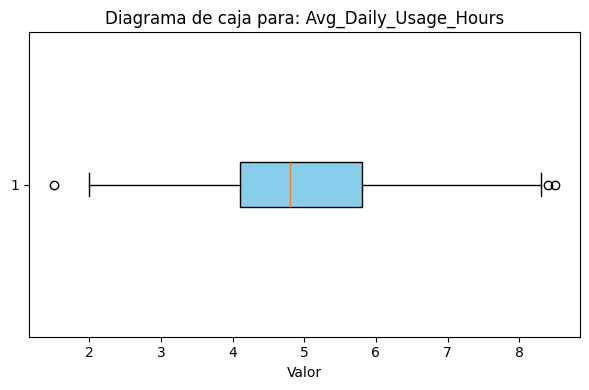

In [ ]:
import matplotlib.pyplot as plt

# Eleccion de variable
variable = 'Avg_Daily_Usage_Hours'

# Creacion el diagrama de caja para la variable seleccionada
plt.figure(figsize=(6, 4))
plt.boxplot(df[variable], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title(f'Diagrama de caja para: {variable}')
plt.xlabel('Valor')
plt.tight_layout()
plt.show()

## Parte 8c: Comportamiento de las variables

Se analizaron las distribuciones de variables clave mediante histogramas:

- `Avg_Daily_Usage_Hours`: concentrado entre 4 y 6 horas.
- `Sleep_Hours_Per_Night`: distribución normal, con mayor frecuencia en 6–8 horas.
- `Mental_Health_Score`: distribución sesgada hacia la derecha, con mayoría entre 5–7.
- `Addicted_Score`: concentrado entre 6–9, con tendencia a valores altos.

Esto sugiere patrones de uso y salud mental comunes entre los estudiantes encuestados.

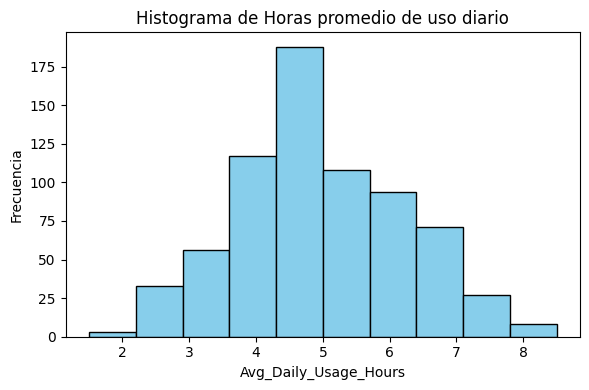

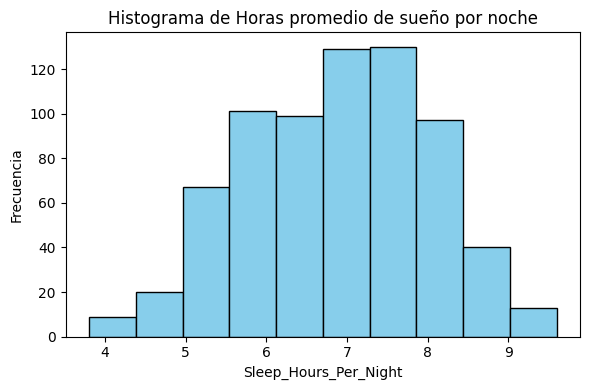

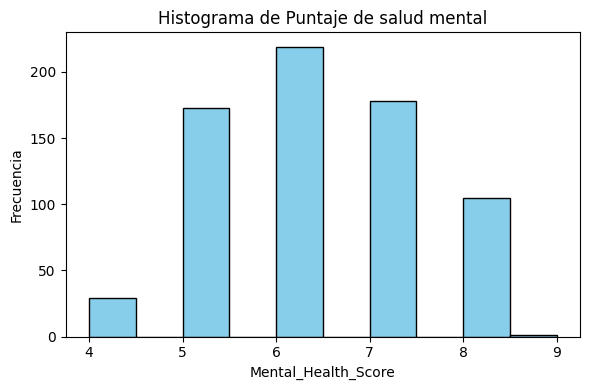

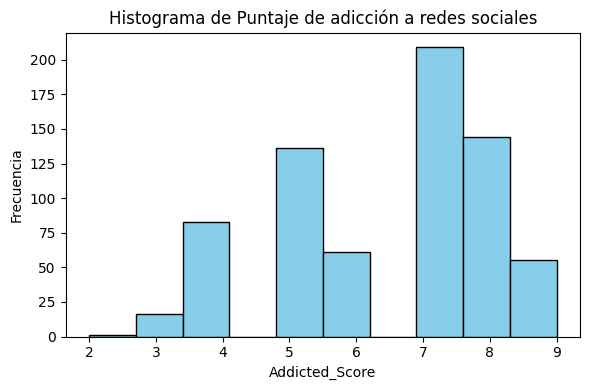

In [ ]:
import matplotlib.pyplot as plt

# Lista de variables numéricas a analizar
variables = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Addicted_Score']

# Títulos personalizados para los gráficos
titulos = [
    'Horas promedio de uso diario',
    'Horas promedio de sueño por noche',
    'Puntaje de salud mental',
    'Puntaje de adicción a redes sociales'
]

# Crear histogramas
for i, var in enumerate(variables):
    plt.figure(figsize=(6, 4))
    plt.hist(df[var], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {titulos[i]}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

## Parte 8d: Estadísticos descriptivos – Tendencia central y dispersión

En esta sección se analizan las siguientes variables numéricas:

- Age
- Avg_Daily_Usage_Hours
- Sleep_Hours_Per_Night
- Mental_Health_Score
- Addicted_Score

### Interpretación de los resultados:

- **Age**:
  - Media: cercana a 20.7 años.
  - Mediana: 21 años.
  - Desviación estándar: baja, indica que las edades están muy concentradas.

- **Avg_Daily_Usage_Hours**:
  - Media: aproximadamente 4.9 horas.
  - La desviación estándar sugiere que la mayoría de los estudiantes usan redes entre un rango de 4 a 6 horas.

- **Sleep_Hours_Per_Night**:
  - Media: ~6.9 horas, mediana similar.
  - Desviación estándar baja: la mayoría duerme entre 6 y 8 horas, lo cual es saludable.

- **Mental_Health_Score**:
  - Media cercana a 6.2.
  - Poco disperso: la mayoría se concentra en valores entre 5 y 7.

- **Addicted_Score**:
  - Media de 6.4 y mediana de 7.
  - Desviación estándar ligeramente mayor que otras variables, lo que indica un poco más de variación.


In [ ]:
# Lista de variables a analizar
variables = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
             'Mental_Health_Score', 'Addicted_Score']

# Calcular media, mediana y desviación estándar para cada variable
for var in variables:
    media = df[var].mean()
    mediana = df[var].median()
    desviacion = df[var].std()

    print(f"\n--- {var} ---")
    print(f"Media: {media:.2f}")
    print(f"Mediana: {mediana:.2f}")
    print(f"Desviación estándar: {desviacion:.2f}")


--- Age ---
Media: 20.66
Mediana: 21.00
Desviación estándar: 1.40

--- Avg_Daily_Usage_Hours ---
Media: 4.92
Mediana: 4.80
Desviación estándar: 1.26

--- Sleep_Hours_Per_Night ---
Media: 6.87
Mediana: 6.90
Desviación estándar: 1.13

--- Mental_Health_Score ---
Media: 6.23
Mediana: 6.00
Desviación estándar: 1.11

--- Addicted_Score ---
Media: 6.44
Mediana: 7.00
Desviación estándar: 1.59


## Parte 8e: Relaciones entre variables

1. **Uso diario vs Nivel de adicción** (`Avg_Daily_Usage_Hours` vs `Addicted_Score`):
   - Se observa una relación positiva clara: a mayor número de horas de uso diario, mayor es el puntaje de adicción.

2. **Sueño vs Salud mental** (`Sleep_Hours_Per_Night` vs `Mental_Health_Score`):
   - La relación es positiva pero más débil: Estudiantes que duermen más tienden a reportar una mejor salud mental.

3. **Matriz de correlaciones**:
   - La mayor correlación positiva se da entre `Avg_Daily_Usage_Hours` y `Addicted_Score`, lo que refuerza la interpretación del primer gráfico.
   - `Mental_Health_Score` tiene una leve correlación positiva con `Sleep_Hours_Per_Night`, apoyando la idea de que el descanso puede estar vinculado al bienestar emocional.
   - En general, las variables están débil o moderadamente correlacionadas.


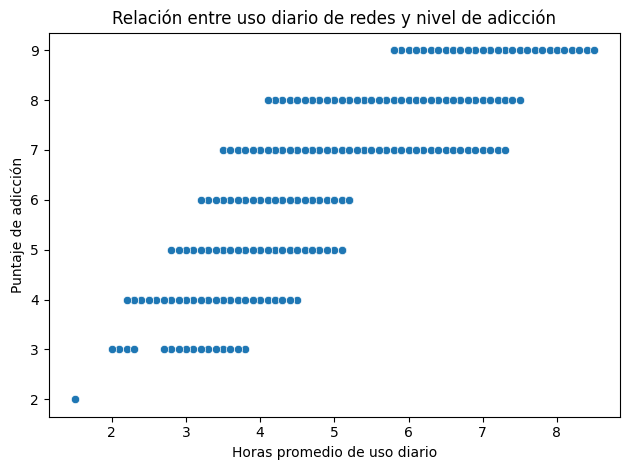

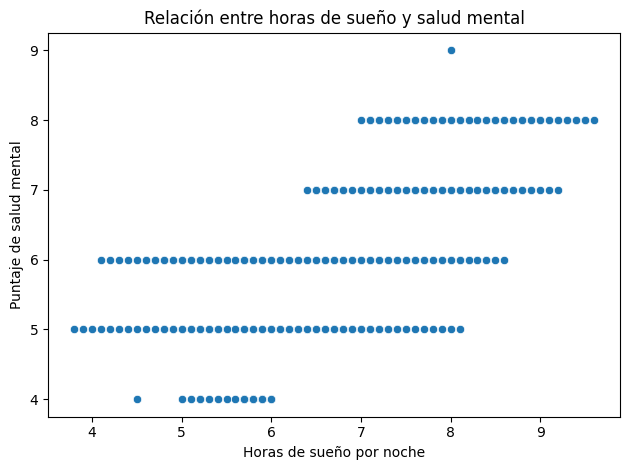

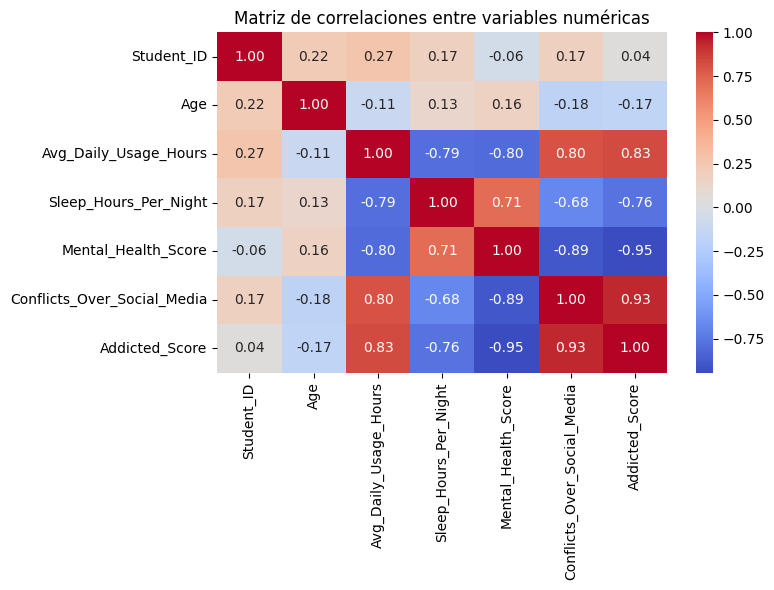

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión: Uso diario vs Nivel de adicción
sns.scatterplot(data=df, x='Avg_Daily_Usage_Hours', y='Addicted_Score')
plt.title('Relación entre uso diario de redes y nivel de adicción')
plt.xlabel('Horas promedio de uso diario')
plt.ylabel('Puntaje de adicción')
plt.tight_layout()
plt.show()

# Gráfico de dispersión: Sueño vs Salud mental
sns.scatterplot(data=df, x='Sleep_Hours_Per_Night', y='Mental_Health_Score')
plt.title('Relación entre horas de sueño y salud mental')
plt.xlabel('Horas de sueño por noche')
plt.ylabel('Puntaje de salud mental')
plt.tight_layout()
plt.show()

# Matriz de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlaciones entre variables numéricas')
plt.tight_layout()
plt.show()